<a href="https://colab.research.google.com/github/awol380/Machine-Learning-2410-Assignment-Group1/blob/main/Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting XYZ
## Phase 1: Data Pre-processing, Exploration and Visualisation <br>
### Group Name: ProjectGroup 1
### Adam Wall s3923668
### Kushgar Singh s4027002
### Ayush Tripathi s3941245

## Table of Contents

## Introduction
### Dataset Source:

The source of the dataset on Vehicle Fuel Economy was Kaggle (MAHARAJ, 2024).  The vehicles included in the dataset include models from 1984 to 2017.

### Dataset Details:
The original dataset has 81 features such as transmission, cyclinders, fuel type, fuel consumption and cO2 emissions. There are 38,113 records. The dataset lists one car per record which are independent of each other.

### Dataset Features:
### Target Feature:

In [13]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
# see all the columns
pd.set_option('display.max_columns', None)



In [14]:
url = 'https://raw.githubusercontent.com/awol380/Machine-Learning-2410-Assignment-Group1/main/fuel.csv'
data = pd.read_csv(url)

In [15]:
data.shape

(38113, 81)

In [16]:
data.columns.to_list()

['vehicle_id',
 'year',
 'make',
 'model',
 'class',
 'drive',
 'transmission',
 'transmission_type',
 'engine_index',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'turbocharger',
 'supercharger',
 'fuel_type',
 'fuel_type_1',
 'fuel_type_2',
 'city_mpg_ft1',
 'unrounded_city_mpg_ft1',
 'city_mpg_ft2',
 'unrounded_city_mpg_ft2',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'unrounded_highway_mpg_ft1',
 'highway_mpg_ft2',
 'unrounded_highway_mpg_ft2',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'unadjusted_city_mpg_ft1',
 'unadjusted_highway_mpg_ft1',
 'unadjusted_city_mpg_ft2',
 'unadjusted_highway_mpg_ft2',
 'combined_mpg_ft1',
 'unrounded_combined_mpg_ft1',
 'combined_mpg_ft2',
 'unrounded_combined_mpg_ft2',
 'combined_electricity_consumption',
 'combined_gasoline_consumption_cd',
 'combined_utility_factor',
 'annual_fuel_cost_ft1',
 'annual

In [17]:
data = data.loc[:,['vehicle_id','year','make','model','class','drive','transmission','engine_cylinders','engine_displacement','fuel_type','fuel_type_1','city_mpg_ft1','highway_mpg_ft1','highway_electricity_consumption','combined_mpg_ft1','combined_electricity_consumption','annual_fuel_cost_ft1','annual_consumption_in_barrels_ft1','tailpipe_co2_in_grams_mile_ft1','start_stop_technology']]

In [18]:
data.shape

(38113, 20)

In [19]:
data.dtypes

vehicle_id                             int64
year                                   int64
make                                  object
model                                 object
class                                 object
drive                                 object
transmission                          object
engine_cylinders                     float64
engine_displacement                  float64
fuel_type                             object
fuel_type_1                           object
city_mpg_ft1                           int64
highway_mpg_ft1                        int64
highway_electricity_consumption      float64
combined_mpg_ft1                       int64
combined_electricity_consumption     float64
annual_fuel_cost_ft1                   int64
annual_consumption_in_barrels_ft1    float64
tailpipe_co2_in_grams_mile_ft1       float64
start_stop_technology                float64
dtype: object

In [20]:
data = data.set_index('vehicle_id')

In [21]:
data.isna().sum() #identify empty variables

year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
engine_cylinders                       136
engine_displacement                    134
fuel_type                                0
fuel_type_1                              0
city_mpg_ft1                             0
highway_mpg_ft1                          0
highway_electricity_consumption          0
combined_mpg_ft1                         0
combined_electricity_consumption         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_in_grams_mile_ft1           0
start_stop_technology                38113
dtype: int64

In [22]:
data = data.drop(['start_stop_technology'], axis=1)

In [23]:
data = data.dropna() #low volumes of NA values, less than 10% of dataset. Many are categorical which cannot be imputed by numeric means.

In [24]:
data.nunique() #identify any constant columns

year                                   34
make                                  127
model                                3662
class                                  34
drive                                   7
transmission                           45
engine_cylinders                        9
engine_displacement                    65
fuel_type                              13
fuel_type_1                             5
city_mpg_ft1                           52
highway_mpg_ft1                        50
highway_electricity_consumption        24
combined_mpg_ft1                       49
combined_electricity_consumption       27
annual_fuel_cost_ft1                   58
annual_consumption_in_barrels_ft1     135
tailpipe_co2_in_grams_mile_ft1        590
dtype: int64

In [25]:
data.describe(include=object) #summarise categorical features

,make,model,class,drive,transmission,fuel_type,fuel_type_1
count,36794,36794,36794,36794,36794,36794,36794
unique,127,3662,34,7,45,13,5
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,Regular,Regular Gasoline
freq,3710,208,5253,13303,10785,24230,25503


In [26]:
categorical_features= list(data.columns[data.dtypes == object])

In [27]:
for feature in categorical_features:
  print(f'{feature}')
  print(data[feature].unique())
  print("\n")
  #engine_cylinders nan

make
['AM General' 'American Motors Corporation' 'Buick' 'Cadillac' 'Chevrolet'
 'Dodge' 'Ford' 'GMC' 'Grumman Olson' 'Import Foreign Auto Sales Inc'
 'Isuzu' 'Jeep' 'Mazda' 'Mitsubishi' 'Nissan' 'Plymouth'
 'S and S Coach Company  E.p. Dutton' 'Subaru'
 'Superior Coaches Div E.p. Dutton' 'Suzuki' 'Toyota' 'Volkswagen'
 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bertone'
 'Bill Dovell Motor Car Company' 'BMW' 'Chrysler' 'E. P. Dutton, Inc.'
 'Ferrari' 'Honda' 'Jaguar' 'Lincoln' 'Lotus' 'Maserati' 'Mercedes-Benz'
 'Mercury' 'Merkur' 'Oldsmobile' 'Peugeot' 'Pininfarina' 'Pontiac'
 'Porsche' 'Renault' 'Rolls-Royce' 'Saab' 'TVR Engineering Ltd' 'Volvo'
 'Acura' 'Autokraft Limited' 'Bitter Gmbh and Co. Kg' 'Hyundai'
 'Lambda Control Systems' 'Lamborghini' 'London Coach Co Inc'
 'Panther Car Company Limited' 'Texas Coach Company' 'Vixen Motor Company'
 'Volga Associated Automobile' 'Yugo' 'ASC Incorporated' 'CCC Engineering'
 'CX Automotive' 'Excalibur Autos' 'Land Rover' 'Mcevoy Motors'
 'Red Shif

In [28]:
#Data prep for data['class'] feature
data['class'] = data['class'].str.replace('2WD','', case=False)
data['class'] = data['class'].str.replace('4WD','', case=False)
data['class'] = data['class'].str.replace('/','', case=False)
data['class'] = data['class'].str.replace(' -','', case=False)
data['class'] = data['class'].str.strip()
data['class'].unique()

array(['Special Purpose Vehicle', 'Large Cars', 'Standard Pickup Trucks',
       'Vans, Passenger Type', 'Vans, Cargo Type',
       'Special Purpose Vehicles', 'Small Pickup Trucks',
       'Minicompact Cars', 'Two Seaters', 'Subcompact Cars',
       'Midsize Cars', 'Midsize-Large Station Wagons', 'Compact Cars',
       'Small Station Wagons', 'Vans', 'Vans Passenger',
       'Midsize Station Wagons', 'Sport Utility Vehicle', 'Minivan',
       'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle'],
      dtype=object)

In [29]:
data['class'] = data['class'].str.replace('Special Purpose Vehicles','Special Purpose Vehicle')
data['class'] = data['class'].str.replace('Vans Passenger','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Minivan','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Standard ','')
data['class'].value_counts()

class
Compact Cars                    5253
Pickup Trucks                   4514
Subcompact Cars                 4484
Sport Utility Vehicle           4307
Midsize Cars                    4165
Special Purpose Vehicle         2371
Two Seaters                     1820
Large Cars                      1810
Small Station Wagons            1382
Minicompact Cars                1230
Small Pickup Trucks             1190
Vans                            1141
Small Sport Utility Vehicle      924
Vans, Passenger Type             700
Midsize-Large Station Wagons     640
Vans, Cargo Type                 438
Midsize Station Wagons           425
Name: count, dtype: int64

In [30]:
#Data prep for data['transmission'] feature
data['transmission'].value_counts()

transmission
Automatic 4-Speed                   10785
Manual 5-Speed                       7959
Automatic 3-Speed                    2720
Automatic (S6)                       2684
Manual 6-Speed                       2448
Automatic 5-Speed                    2191
Automatic 6-Speed                    1447
Manual 4-Speed                       1368
Automatic (S8)                        977
Automatic (S5)                        827
Automatic (variable gear ratios)      697
Automatic 7-Speed                     675
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        233
Auto(AM7)                             166
Auto(AV-S6)                           153
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                         77
Manual 7-Speed       

In [31]:
data['transmission'] = data['transmission'].str.replace('Automatic','Auto')
data[['transmission', 'gears']] = data['transmission'].str.split(' ', n = 1, expand=True)
data[['transmission', 'gears2']] = data['transmission'].str.split('(', n = 1, expand=True)
data['transmission'].value_counts()

transmission
Auto      24865
Manual    11929
Name: count, dtype: int64

In [32]:
#Data prep for new feature data['gear']
data['gears'].fillna(data['gears2'])
data = data.drop(['gears2'], axis=1)
data['gears'] = data['gears'].str.extract('(\d+)')

In [33]:
#Data prep for data['fuel_type'] feature
data['fuel_type'].value_counts()

fuel_type
Regular                        24230
Premium                        10132
Gasoline or E85                 1223
Diesel                           857
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: count, dtype: int64

In [34]:
fuel_df = data.loc[:,['fuel_type','fuel_type_1']]
pd.pivot_table(fuel_df, index='fuel_type', columns='fuel_type_1', aggfunc=len, fill_value=0)

fuel_type_1,Diesel,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
fuel_type,,,,,
CNG,0,0,60,0,0
Diesel,857,0,0,0,0
Gasoline or E85,0,0,0,0,1223
Gasoline or natural gas,0,0,0,0,20
Gasoline or propane,0,0,0,0,8
Midgrade,0,77,0,0,0
Premium,0,0,0,10132,0
Premium Gas or Electricity,0,0,0,18,0
Premium and Electricity,0,0,0,25,0


In [35]:
data.loc[data['fuel_type'] == 'Premium Gas or Electricity', 'fuel_type_1'] = 'Premium Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas or Electricity', 'fuel_type_1'] = 'Regular Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Premium Gas and Electricity', 'fuel_type_1'] = 'Premium Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas and Electricity', 'fuel_type_1'] = 'Regular Hybrid'
data = data.drop(['fuel_type'], axis=1)

In [36]:
data.describe(include=np.number).round(2) #summarise numeric features
#year should be categorical? or removed

,year,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
count,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00,36794.00
mean,2000.67,5.76,3.34,17.64,23.80,0.08,19.90,0.08,1983.13,17.62,475.58
std,10.20,1.75,1.36,4.76,5.79,1.88,5.08,1.86,528.53,4.47,119.12
min,1984.00,2.00,0.60,6.00,9.00,0.00,7.00,0.00,600.00,0.06,29.00
25%,1991.00,4.00,2.20,15.00,20.00,0.00,16.00,0.00,1600.00,14.98,397.00
50%,2001.00,6.00,3.00,17.00,24.00,0.00,19.00,0.00,1950.00,17.35,467.74
75%,2010.00,6.00,4.30,20.00,27.00,0.00,22.00,0.00,2350.00,20.60,555.44
max,2017.00,16.00,8.40,58.00,61.00,71.00,58.00,71.00,6050.00,47.09,1269.57


In [37]:
#data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [38]:
data = data.drop_duplicates(subset=data.columns.difference(['vehicle_id'])) #drop duplicate rows



## Visualisation

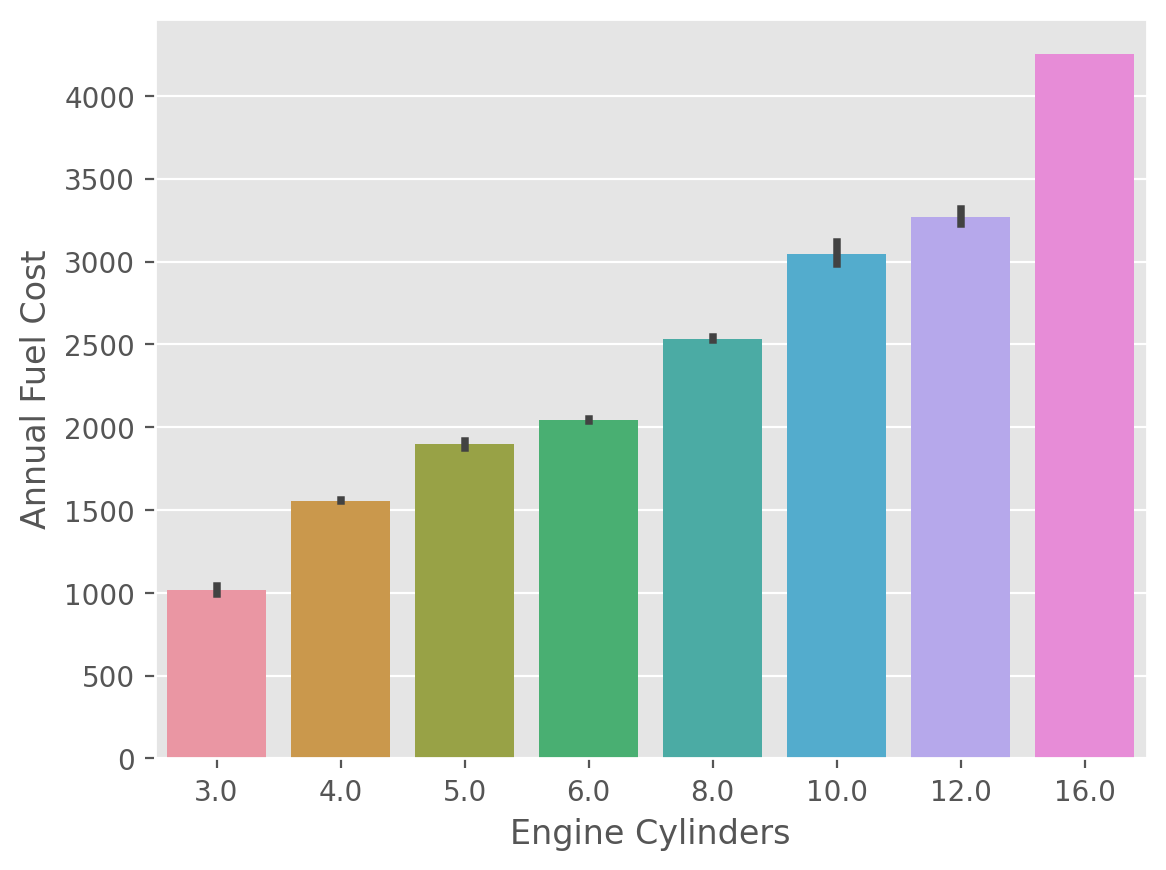

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

import seaborn as sns

# Assuming data is your dataset
filtered_data = data[data['engine_cylinders'] != 2]

sns.barplot(data=filtered_data, x="engine_cylinders", y="annual_fuel_cost_ft1")
plt.xlabel("Engine Cylinders")
plt.ylabel("Annual Fuel Cost")
plt.show()


# As we can see, the annual fuel cost gradually increases as the number of engine cylinders increases. 
#For heavier vehicles, more cylinders are required, which increases the surface area of the piston and 
#consumes more fuel. Engines with more cylinders generate more power, but they also consume more fuel to operate. 
#This is because having more cylinders results in greater displacement and possibly more friction, which leads to higher fuel consumption. 
#While more cylinders may increase fuel consumption, modern engines incorporate advanced technologies such as turbocharging, direct injection, 
#and variable valve timing to improve fuel efficiency.

#### As we can see, the annual fuel cost gradually increases as the number of engine cylinders increases. For heavier vehicles, more cylinders are required, which increases the surface area of the piston and consumes more fuel. Engines with more cylinders generate more power, but they also consume more fuel to operate. This is because having more cylinders results in greater displacement and possibly more friction, which leads to higher fuel consumption. While more cylinders may increase fuel consumption, modern engines incorporate advanced technologies such as turbocharging, direct injection, and variable valve timing to improve fuel efficiency.

In [40]:
data['annual_fuel_cost_ft1']

vehicle_id
27550    2050
27549    2700
27593    2050
28455    2050
27591    1750
         ... 
37564    1350
37547    1900
37548    1850
37703    1700
37687    1750
Name: annual_fuel_cost_ft1, Length: 35858, dtype: int64

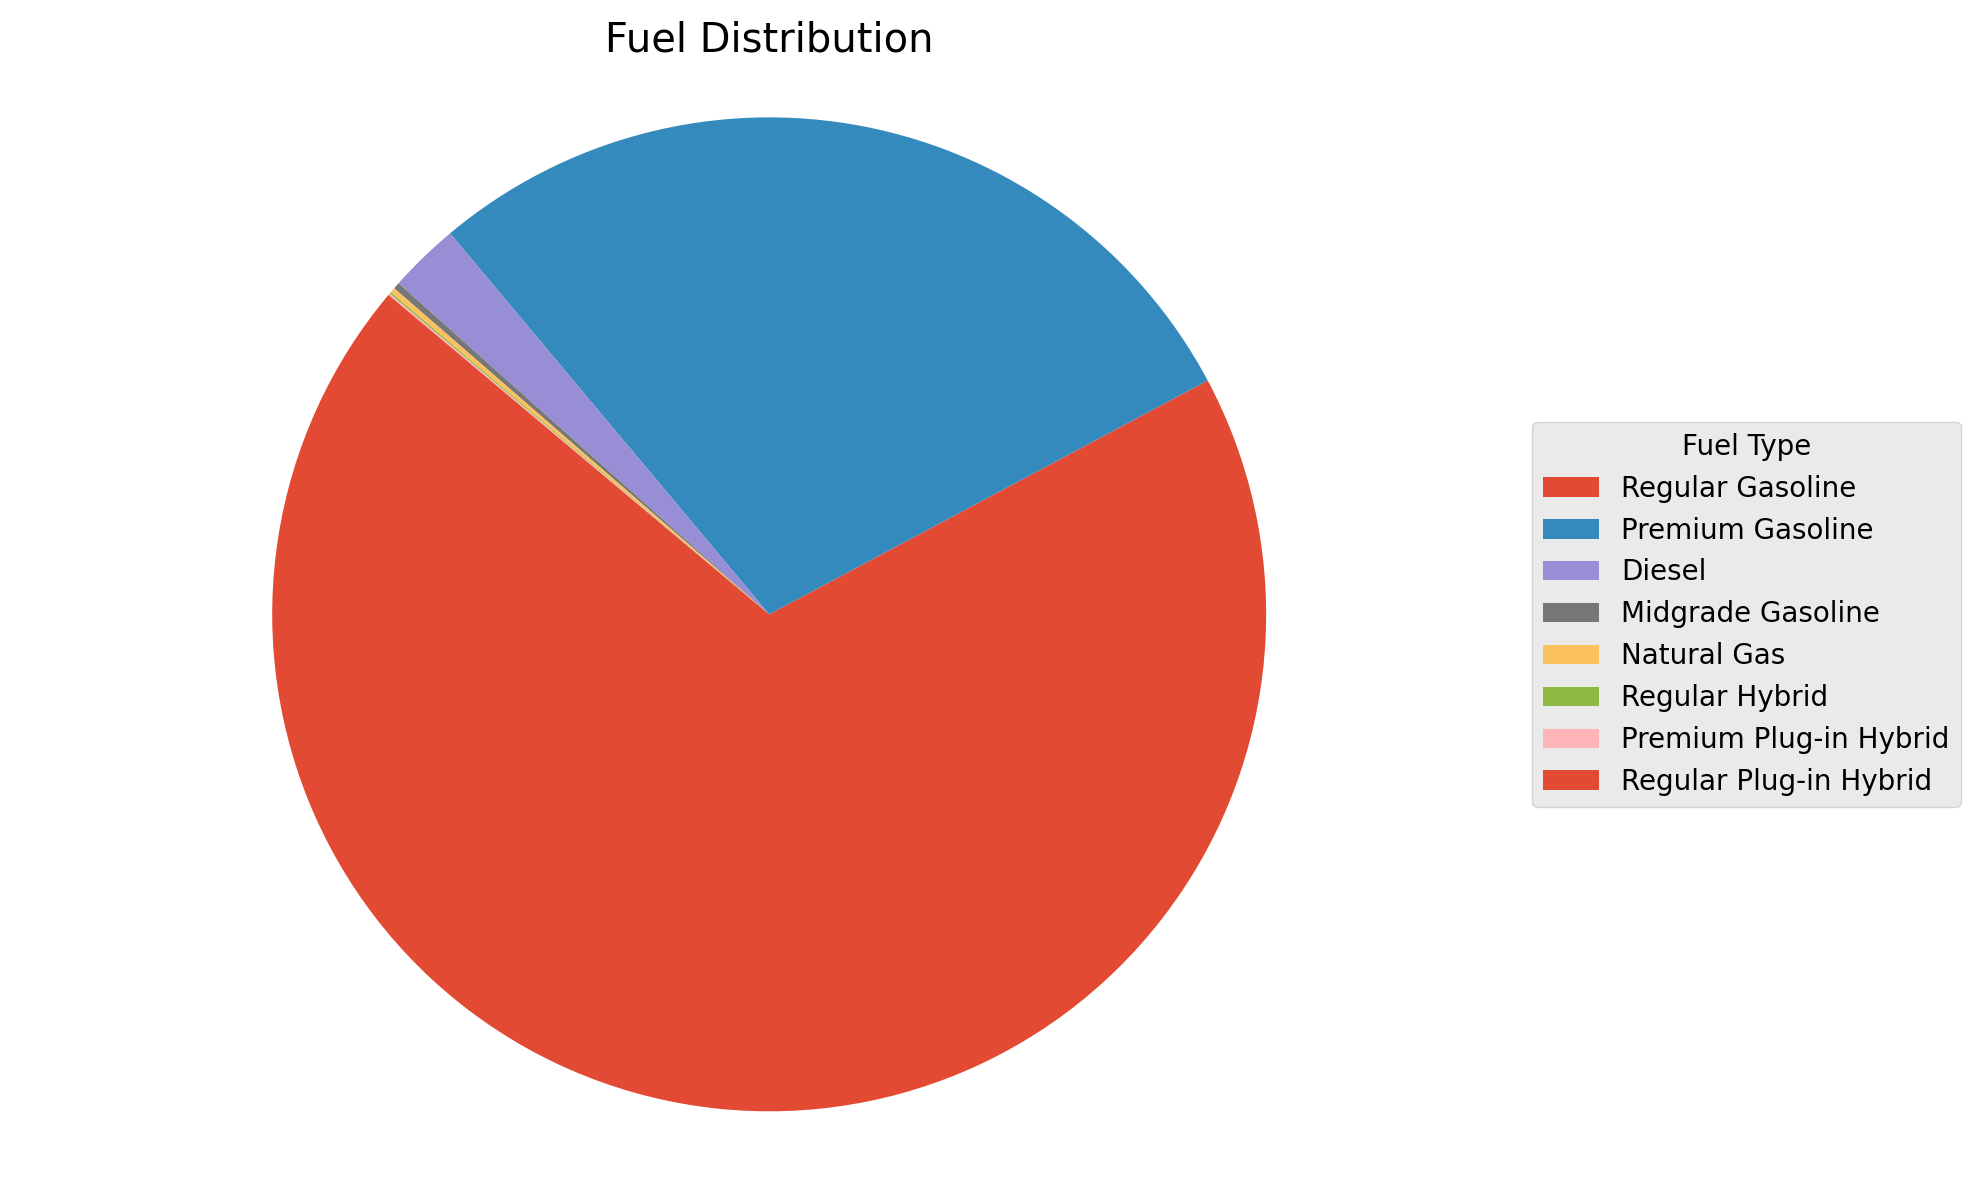

In [47]:
dataaa = data['fuel_type_1'].value_counts()
labels = dataaa.index
size = dataaa.values

# Create a pie chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the pie chart
wedges, _ = plt.pie(size, labels=None, startangle=140)

# Combine labels with percentage values for legend
legend_labels = [f'{label}' for label, size in zip(labels, size)]

# Add labels with percentage values in the legend
plt.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Fuel Type")

plt.title('Fuel Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout
plt.show()


In [42]:
data

,year,make,model,class,drive,transmission,engine_cylinders,engine_displacement,fuel_type_1,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1,gears
vehicle_id,,,,,,,,,,,,,,,,,,
27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle,2-Wheel Drive,Auto,4.0,2.5,Regular Gasoline,18,17,0.0,17,0.0,2050,19.388824,522.764706,3
27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle,2-Wheel Drive,Auto,6.0,4.2,Regular Gasoline,13,13,0.0,13,0.0,2700,25.354615,683.615385,3
27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4-Wheel or All-Wheel Drive,Auto,6.0,4.2,Regular Gasoline,15,20,0.0,17,0.0,2050,19.388824,522.764706,3
28455,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4-Wheel or All-Wheel Drive,Auto,6.0,4.2,Regular Gasoline,15,19,0.0,17,0.0,2050,19.388824,522.764706,3
27591,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle,4-Wheel or All-Wheel Drive,Manual,4.0,2.5,Regular Gasoline,19,22,0.0,20,0.0,1750,16.480500,444.350000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle,Front-Wheel Drive,Auto,4.0,2.0,Regular Gasoline,23,30,0.0,26,0.0,1350,12.677308,348.000000,8
37547,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All-Wheel Drive,Auto,4.0,2.0,Premium Gasoline,20,25,0.0,22,0.0,1900,14.982273,399.000000,8
37548,2017,Volvo,XC90 AWD,Sport Utility Vehicle,All-Wheel Drive,Auto,4.0,2.0,Premium Gasoline,22,25,0.0,23,0.0,1850,14.330870,384.000000,8


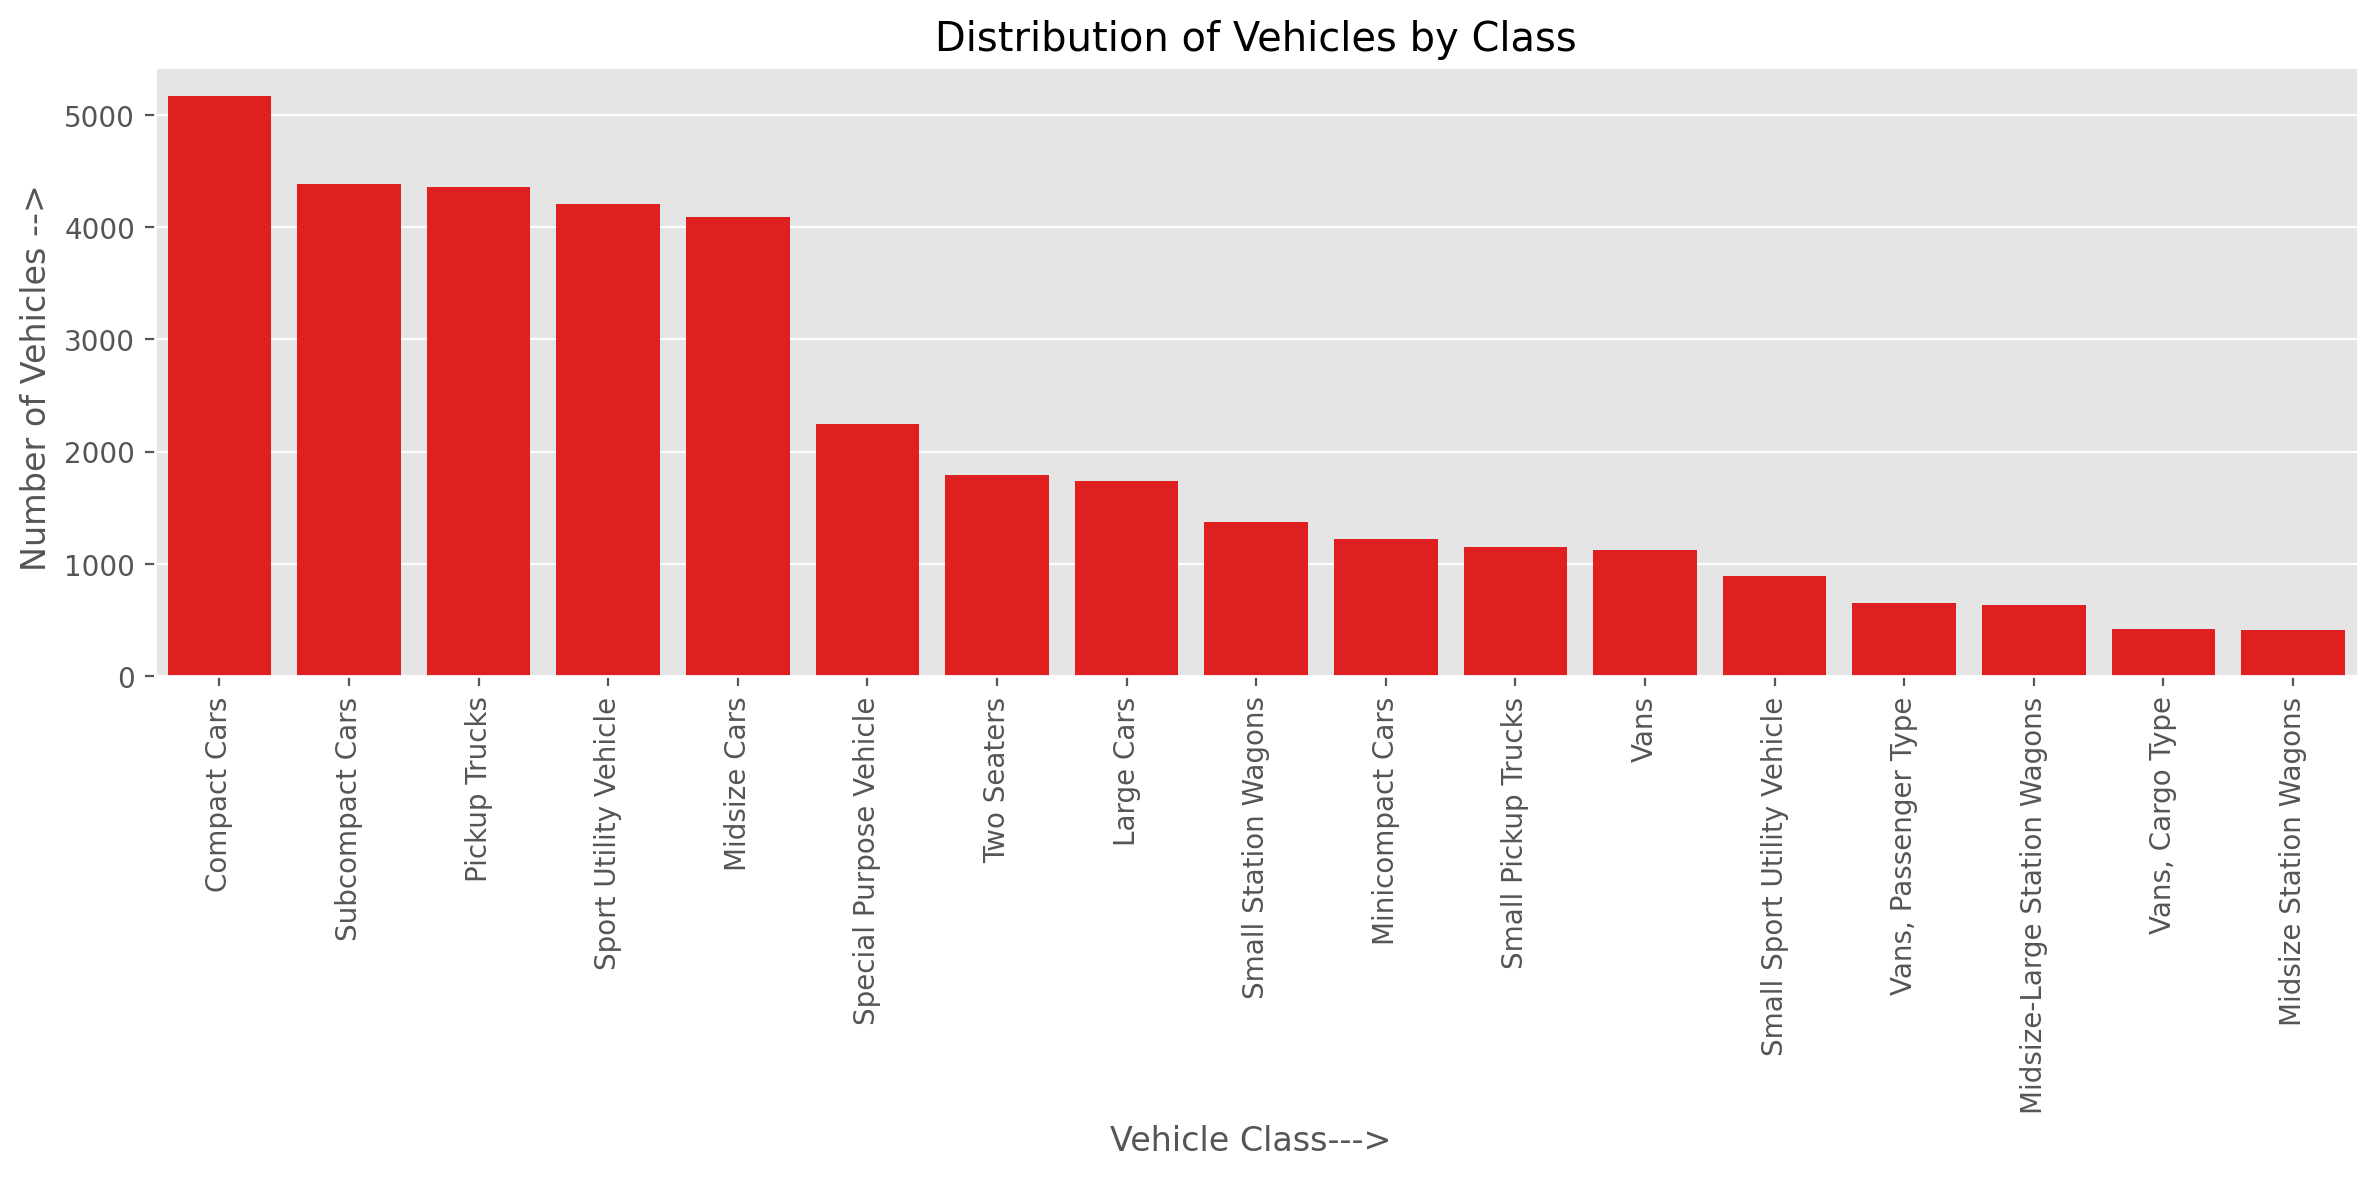

In [43]:
plt.figure(figsize=(12, 6))
vehicle_classes = data['class'].value_counts()
sns.barplot(x=vehicle_classes.index, y=vehicle_classes.values, color='red')
plt.xticks(rotation=90)
plt.title('Distribution of Vehicles by Class')
plt.xlabel('Vehicle Class---> ')
plt.ylabel('Number of Vehicles --> ')
plt.tight_layout()
plt.show()

#The bar chart is titled "Distribution of Vehicles by Class" and it shows the number of vehicles in different classes. 
#Compact cars are the most numerous, followed closely by subcompact cars, pickup trucks, and sport utility vehicles. 
#Midsize cars and special purpose vehicles have a lower representation, with two-seaters, large cars, and small station wagons even less so. 
#The least common are minicompact cars, small pickup trucks, vans, small sport utility vehicles, vans passenger type, midsize-large station wagons, vans cargo type, and midsize station wagons. 
#The number of vehicles in each class decreases as you move from left to right across the chart.

In [44]:
data['fuel_type_1'].value_counts()

fuel_type_1
Regular Gasoline          24709
Premium Gasoline          10148
Diesel                      824
Midgrade Gasoline            77
Natural Gas                  60
Regular Hybrid               20
Premium Plug-in Hybrid       18
Regular Plug-in Hybrid        2
Name: count, dtype: int64

<Figure size 1200x1200 with 0 Axes>

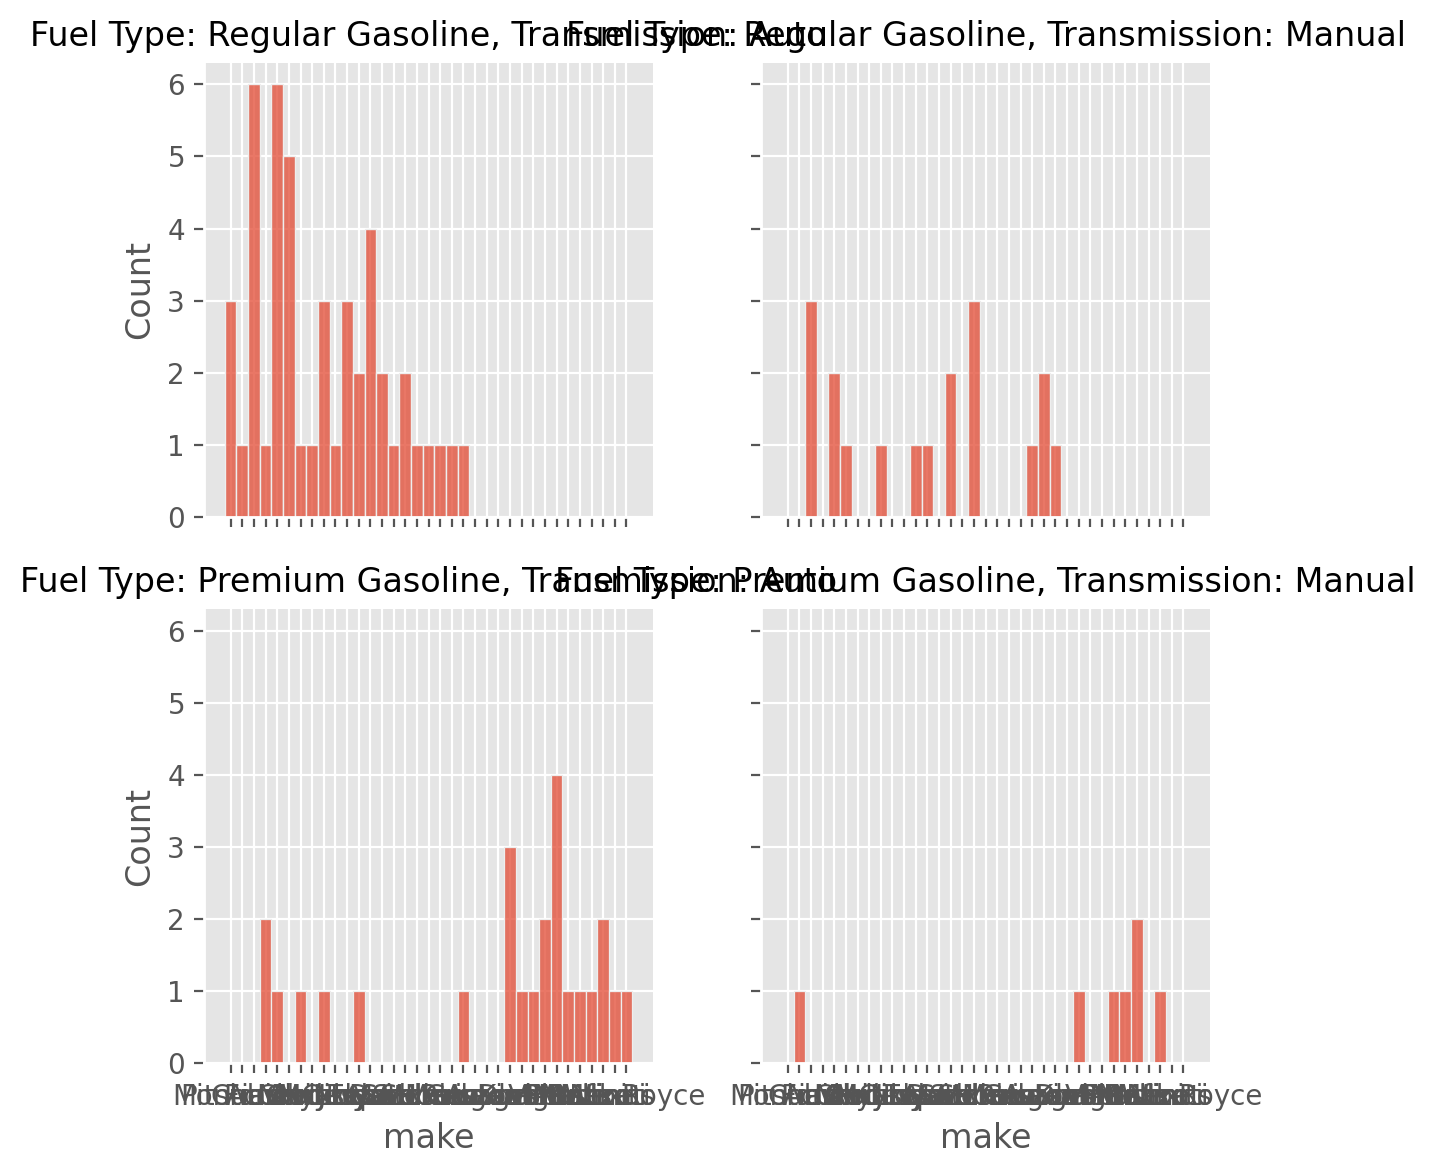

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
rand_data = data.sample(n=100)
# Filter data for only 'Regular Gasoline' and 'Premium Gasoline'
d = rand_data[rand_data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Get the counts of 'make' for each category
y = d['make'].value_counts()

# Create FacetGrid
g = sns.FacetGrid(d, col='transmission', row='fuel_type_1')

# Map histplot to FacetGrid
g.map(sns.histplot, 'make', bins=y.values)

# Set titles
g.set_titles("Fuel Type: {row_name}, Transmission: {col_name}")

plt.show()


ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 47 and the vector passed to `x` has length 35.

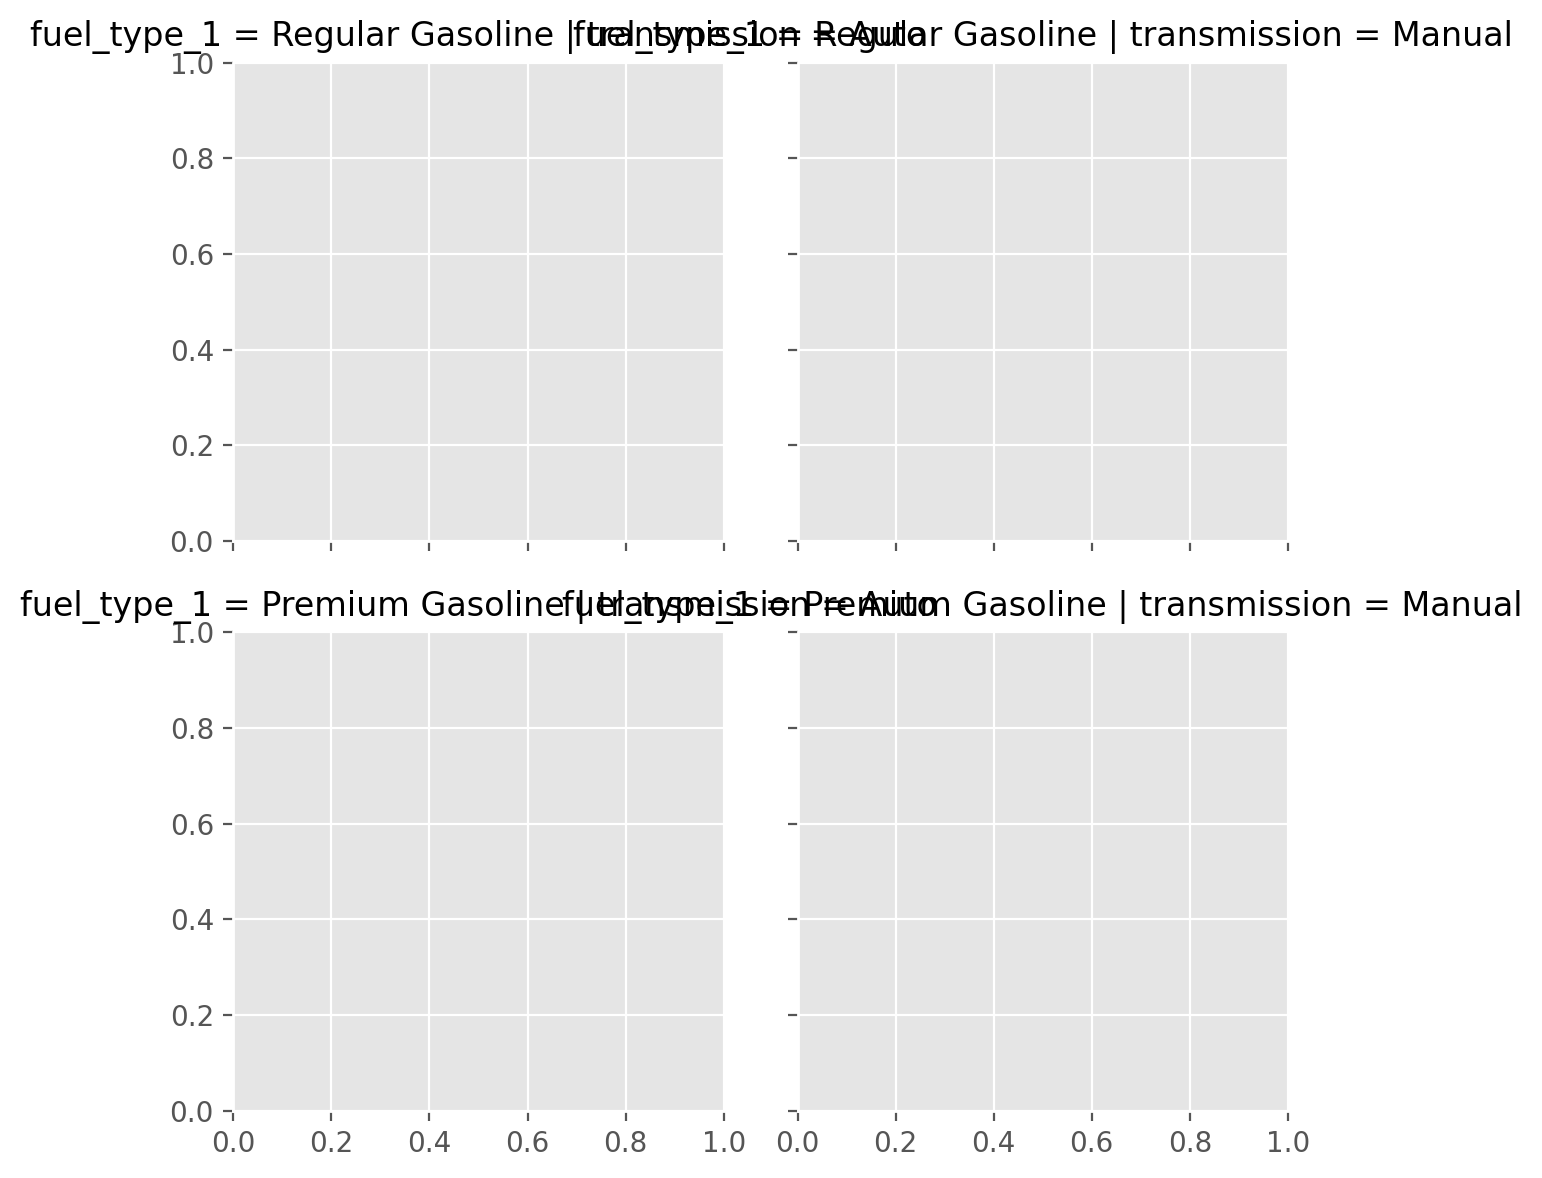

In [46]:

d = rand_data[rand_data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]
d
y = d['make'].value_counts()
g = sns.FacetGrid(d, col='transmission', row='fuel_type_1')
g.map_dataframe(sns.histplot, x=y.index)

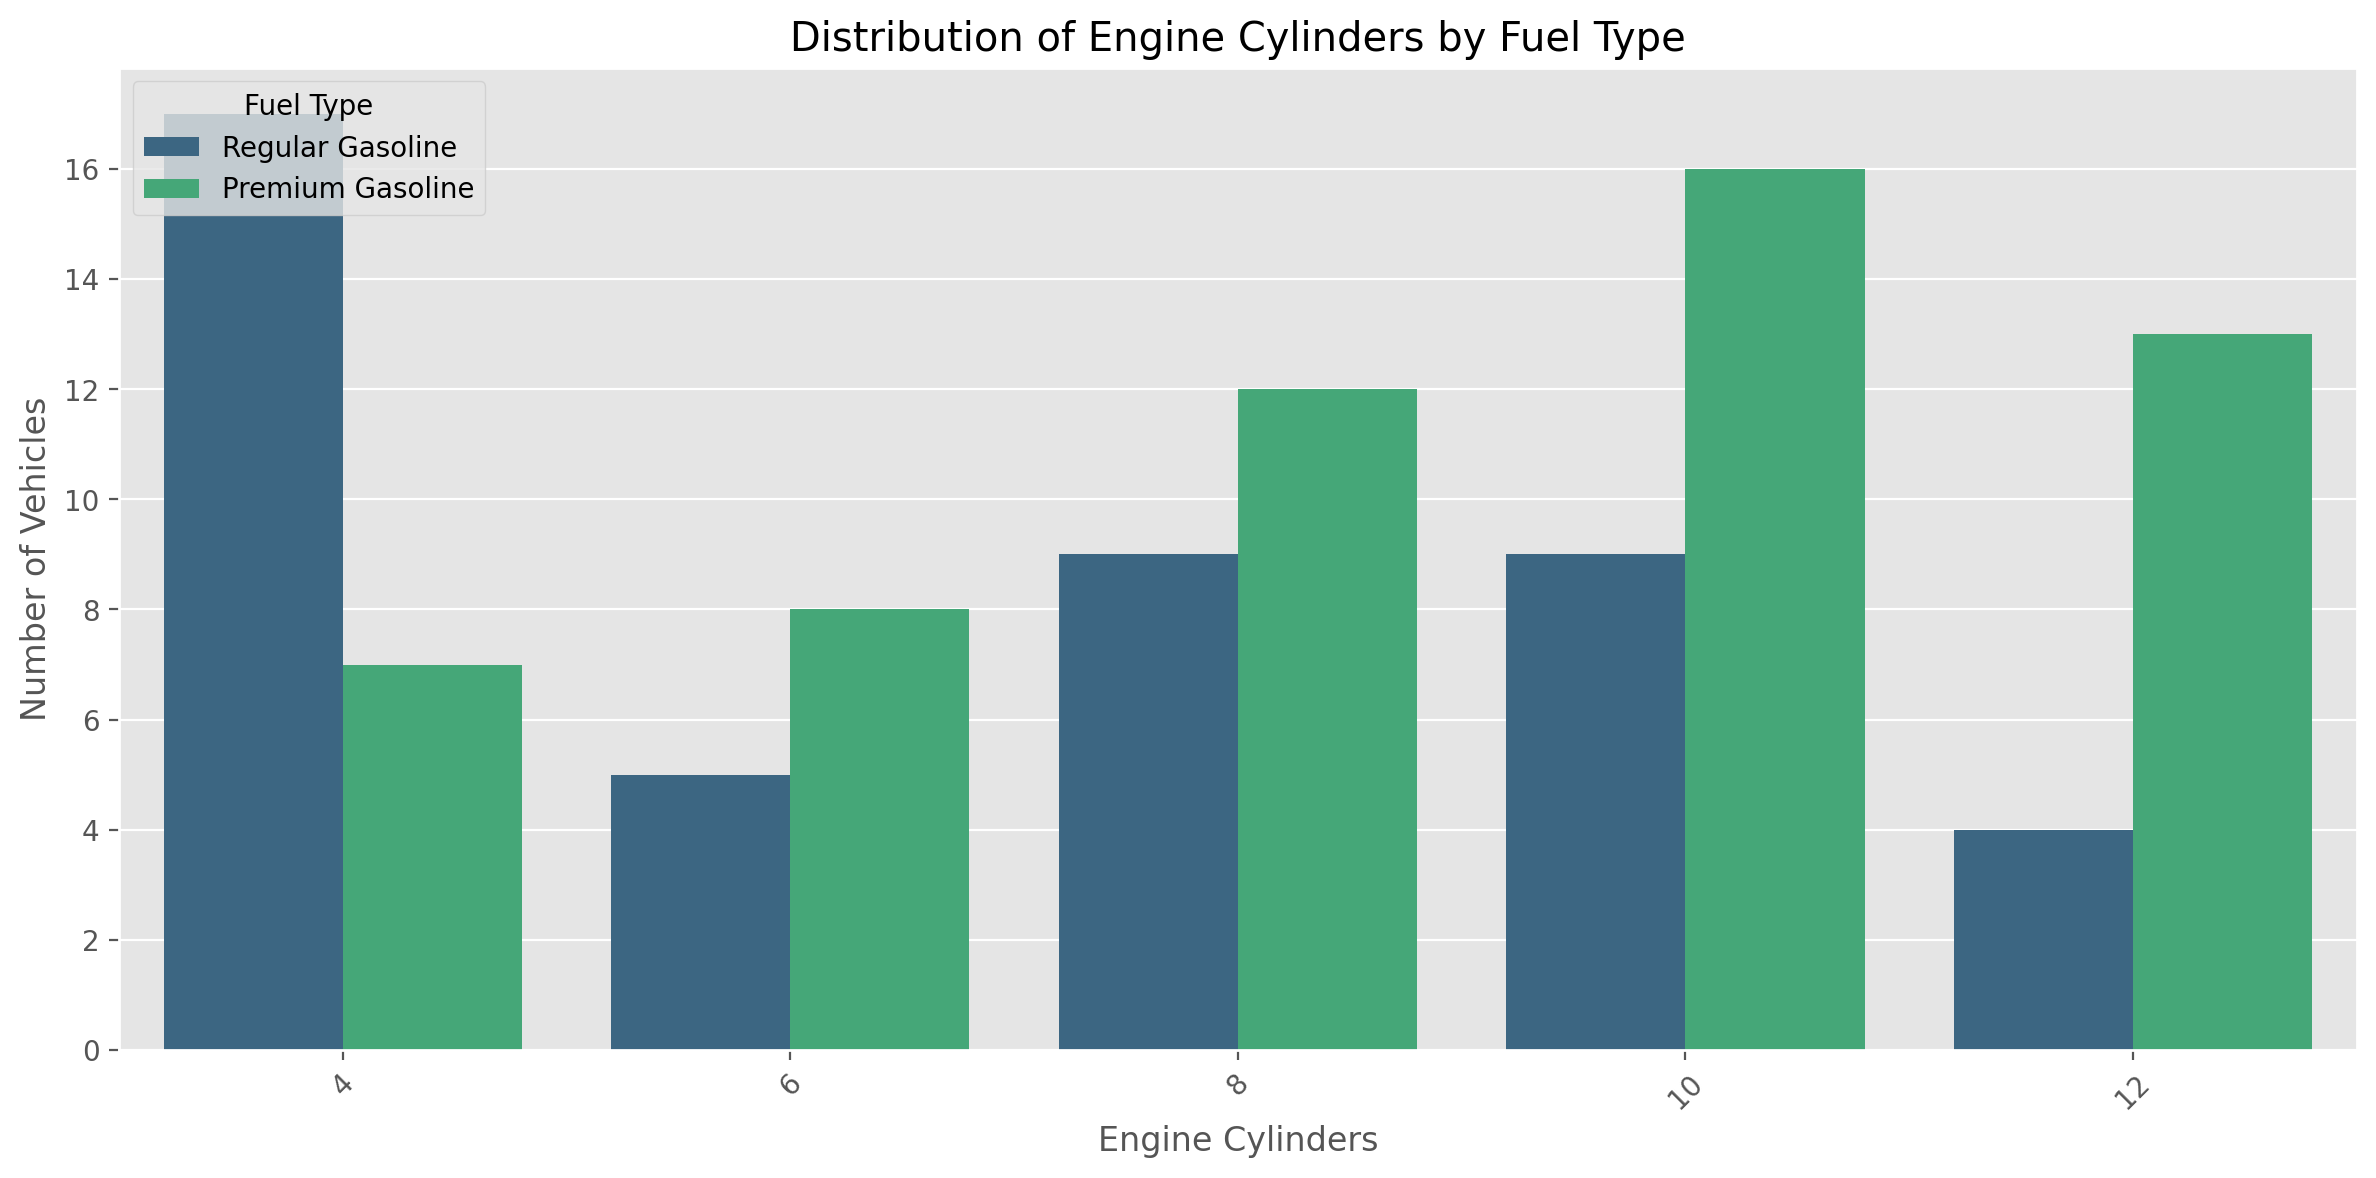

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Let's assume 'data' is a pandas DataFrame with the relevant data. Since I don't have access to the actual data,
# I'll create a mock DataFrame with similar structure for demonstration purposes.
np.random.seed(0)
mock_data = {
    'fuel_type_1': np.random.choice(['Regular Gasoline', 'Premium Gasoline'], 100),
    'engine_cylinders': np.random.choice([4, 6, 8, 10, 12], 100)
}
data = pd.DataFrame(mock_data)

# Filter data for only 'Regular Gasoline' and 'Premium Gasoline'
filtered_data = data[data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Create countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='engine_cylinders', hue='fuel_type_1', data=filtered_data, 
              order=sorted(filtered_data['engine_cylinders'].unique()), palette='viridis')

# Customize plot
plt.xticks(rotation=45)
plt.title('Distribution of Engine Cylinders by Fuel Type')
plt.xlabel('Engine Cylinders')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.legend(title='Fuel Type', loc='upper left')
plt.show()

""" The bar chart displays the distribution of engine cylinders for vehicles using regular gasoline compared to those using premium gasoline. 
The number of vehicles is categorized by the number of engine cylinders (4, 6, 8, 10, 12). For both fuel types, 
4-cylinder engines are the most common, followed by 6-cylinder engines. There are considerably fewer vehicles with 8-cylinder 
engines and even fewer with 10 and 12 cylinders. The chart suggests that regular gasoline is more commonly used in vehicles with fewer cylinders, 
while premium gasoline is more prevalent in vehicles with a higher number of cylinders, especially for 10- and 12-cylinder engines. """

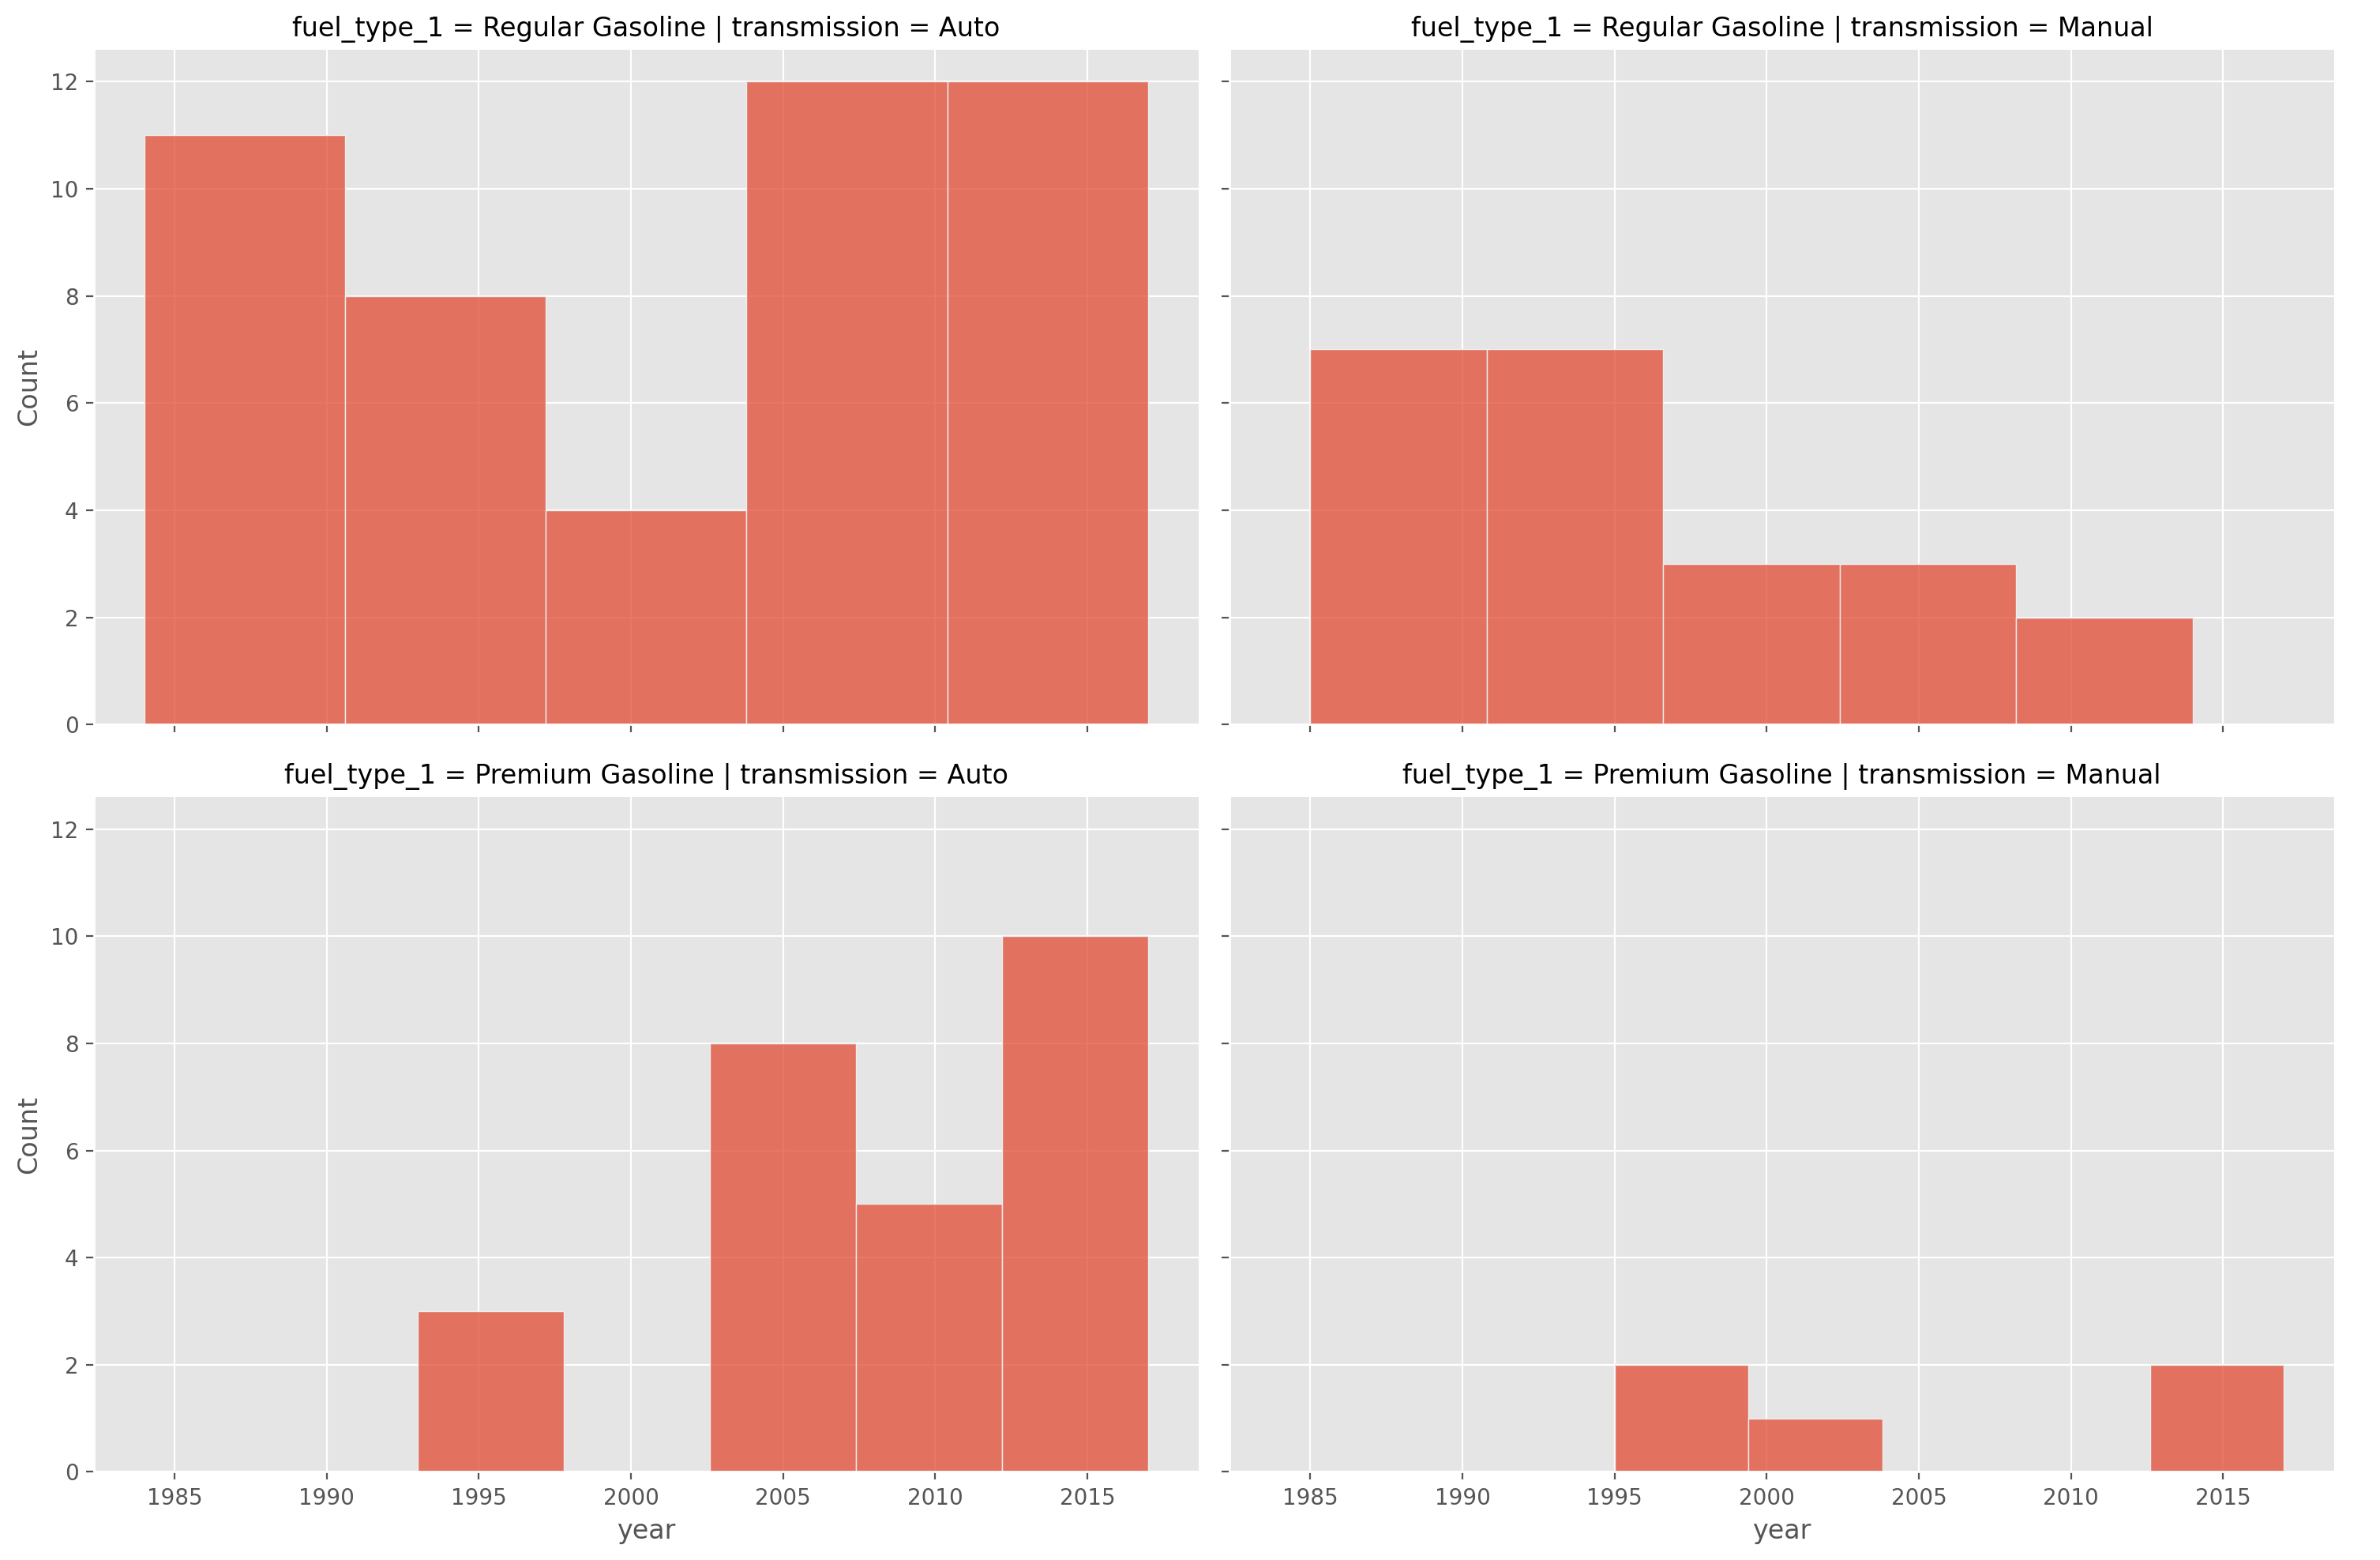

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset contains 'year', 'fuel_type_1', and 'transmission' columns

# Filter data for only 'Regular Gasoline' and 'Premium Gasoline'
d = rand_data[rand_data['fuel_type_1'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Create FacetGrid with hue
g = sns.FacetGrid(d, col='transmission', row='fuel_type_1', aspect=1.5, height=5)
g.map_dataframe(sns.histplot, x='year', bins=5)
g.add_legend()

plt.show()

""" The graphs show the number of vehicles using regular and premium gasoline with various types of transmissions over time. 
For both fuel types, the proportion of vehicles with automatic transmissions appears to be higher than that with manual transmissions.
The top left graph shows vehicles that use regular gasoline with automatic transmissions, and the count rises significantly over time, peaking around 2010. 
In contrast, the top right graph depicts vehicles with manual transmissions that use regular gasoline, 
and it shows a declining trend over time.
Similarly, the bottom graphs show the trends for vehicles that use premium gasoline. 
Similarly, the bottom graphs show the trends for vehicles that use premium gasoline. 
The bottom left graph for automatic transmissions shows an increase in the number of vehicles around the late 2000s, 
whereas the bottom right graph for manual transmissions shows a modest increase around 2000 followed by a decrease.
Across all graphs, it appears that the preference for automatic transmissions has grown over time, regardless of fuel type, 
while vehicles with manual transmissions have become less popular.

 """